<a href="https://colab.research.google.com/github/JohanSantanaGalvanJob/Data-Scaling/blob/main/JOHAN_SANTANA_GALVAN_Escalamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejemplo 5:** Escalamiento de datos

In [1]:
# JOHAN SANTANA GALVÁN
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector

# Creación del conjunto de datos (dos máquinas embotelladoras)
# ==============================================================================
muA, sigmaA = 1000, 1 # media y desviación estándar embotelladora A
muB, sigmaB = 1000, 4 # media y desviación estándar embotelladora B
datosA = np.random.normal(muA, sigmaA, 1000)
datosB = np.random.normal(muB, sigmaB, 1000)
datos=np.column_stack((datosA, datosB))

# Título: ¿qué es un DataFrame?
#Url: https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/#entonces-qu%C3%A9-es-un-dataframe
Data = pd.DataFrame(datos, columns=['Embotelladora_A', 'Embotelladora_B'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_prep_SS = preprocessor_SS.fit_transform(Data)
Data_prep_RR = preprocessor_RR.fit_transform(Data)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)
Data_prep_SS_v2  = preprocessor_SS.transform(Data) # Podemos observar que los resultados son los mismos que el método fit_transform

# Título: Diferencia entre fit_transform() y transform() en Scikit-Learn
# Url: https://forum.huawei.com/enterprise/es/diferencia-entre-fit-transform-y-transform-en-scikit-learn/thread/891275-100757

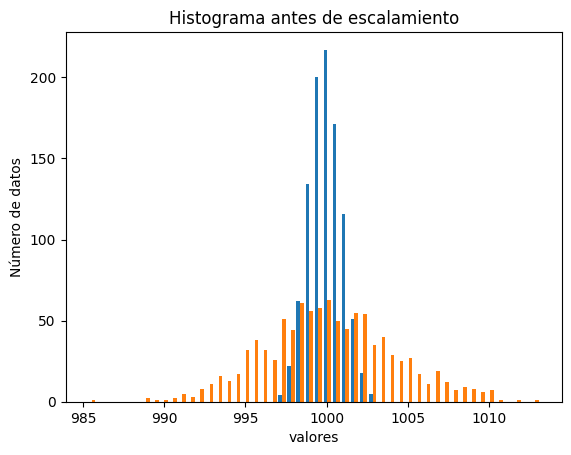

In [2]:
# Histograma antes de escalamiento
plt.hist(Data, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes de escalamiento')
plt.show()

Representacióón de los datos escalado con **Standard Scaler**
 - Estandariación/Escalamiento por desviación típica


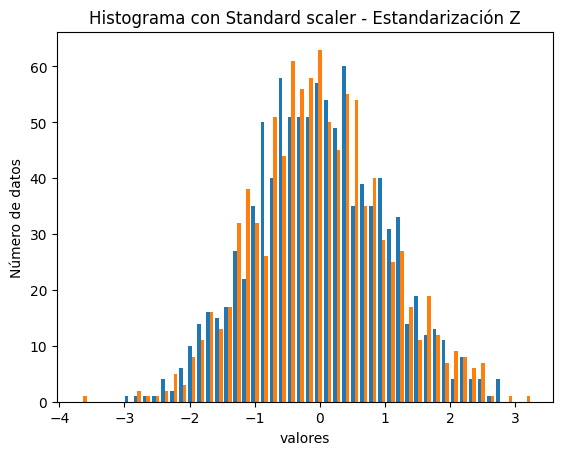

In [3]:
plt.hist(Data_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con Standard scaler - Estandarización Z')
plt.show()

**NOTA** Observar que las **dos** variables tienen la misma desviación típica (s=1)

In [4]:
Data_prep_SS.std()


0.9999999999999999

Representación de los datos escalado con **Min Max Scaler** - Estandariación/Escalamiento por rangos



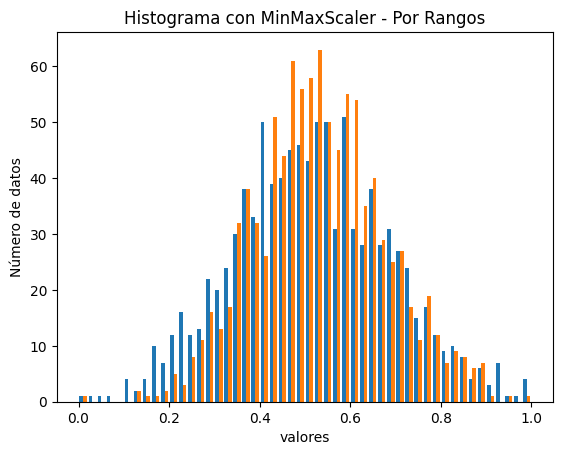

In [5]:
plt.hist(Data_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Por Rangos')
plt.show()

**NOTA** Observar que las **dos** variables tienen el mismo rango

In [6]:
#Rango
#Data_prep_RR[:,0]
np.max(Data_prep_RR[:,0])-np.min(Data_prep_RR[:,0])

1.0

In [7]:
#Rango
#Data_prep_RR[:,1]
np.max(Data_prep_RR[:,1])-np.min(Data_prep_RR[:,1])

1.0

In [ ]:
X = np.arange(1,11)

# ¿Cuánto vale la media, mediana, la desviación estándar muestral, la varianza muestral y el rango de la variable X?
media = np.mean(X)
print('media: ', media)
mediana = np.median(X)
print('mediana: ', mediana)
desviacionEstandar = np.std(X)
desviacionEstandarArreglo = np.std(X, ddof=1)
print('Desviación estándar: ', desviacionEstandar)
print('Desviación estándar arreglada: ', desviacionEstandarArreglo)
varianza = np.var(X)
print('Varianza: ', varianza)
rango = np.max(X)-np.min(X)
print('Rango: ', rango)
# Utilizar la función describe() de Panda, para obtener la media, desviación estándar, etc…
pd.DataFrame(X).describe()

In [22]:
Data = pd.DataFrame(X)
numeric_cols =  Data.select_dtypes(include=['float64', 'int']).columns.to_list()

In [23]:
# Estandarizar la variable (escalamiento) mediante rangos y a continuación calcular la media y la mediana de la variable escalada.
preprocessor_RR = ColumnTransformer([('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')
Data_prep_RR = preprocessor_RR.fit_transform(Data)
media = np.mean(Data_prep_RR)
print('media: ', media)
mediana = np.median(Data_prep_RR)
print('mediana: ', mediana)

media:  0.5
mediana:  0.5


In [25]:
# Repetir el apartado anterior con el escalamiento Z - score
preprocessor_SS = ColumnTransformer([('scale', StandardScaler(), numeric_cols)],remainder='passthrough')
Data_prep_SS = preprocessor_SS.fit_transform(Data)
media = np.mean(Data_prep_SS)
print('media: ', media)
mediana = np.median(Data_prep_SS)
print('mediana: ', mediana)

media:  -6.661338147750939e-17
mediana:  0.0
